In [29]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean
import datetime
import seaborn as sns
from scipy import interpolate

In [30]:
df = pd.read_csv('/Users/kyra/documents/Summer23/pCESM.3Ma_CO2_d18O_obPara.txt', delim_whitespace=True, header=None)
df.columns = ['Kiloyear', 'CO2','d18O from LR04','Eccentricity','Obliquity','Precession']

In [54]:
na = df.to_numpy()
forc_time = na[1750:3000, 0]
co2 = na[1750:3000, 1]
d180 = na[1750:3000, 2]
eccentricity = na[1750:3000, 3]
obliquity = na[1750:3000, 4]
precession = na[1750:3000, 5]

ice_time = np.arange(125,0,-0.1)
forc_time = na[1750:3000, 0]

f_linear = interpolate.interp1d(forc_time, co2, kind='linear')
re_co2 = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, d180, kind='linear')
re_d180 = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, eccentricity, kind='linear')
re_ec = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, obliquity, kind='linear')
re_ob = f_linear(ice_time+1)

f_linear = interpolate.interp1d(forc_time, precession, kind='linear')
re_pr = f_linear(ice_time+1)

print(np.shape(re_co2))

(1250,)


In [56]:
ts = xr.open_dataset('/Users/kyra/documents/Summer23/shout/totimerge.nc')
ts = np.array(ts.toti).reshape(1250)
# print(np.min(ts))
# print(np.max(ts))
# print(ts)
# change = -ts + (26.5 * 10**15)
# ice_mass = (0.9167) * change
# sle = (ice_mass * (1/(361.8*(10**12))))
# #sle = np.array(sle).reshape(1250)

In [57]:
ts2 = xr.open_dataset('/Users/kyra/documents/Summer23/nhout/totimerged.nc')
ts2 = ts2.toti
# print(ts2)
# change2 = -ts2 + (2.9 * 10**15)
# ice_mass2 = (0.9167) * change2
# sle2 = ((ice_mass2 * (1/(361.8*(10**12)))))
# #print(sle2)
# new_sle2 = np.array(sle2).reshape(1250)
# new_sle2 += sle

<xarray.DataArray 'toti' (time: 1250)>
[1250 values with dtype=float32]
Coordinates:
  * time     (time) float32 200.0 200.0 300.0 ... 1.248e+05 1.249e+05 1.25e+05
Attributes:
    long_name:       ice volume
    units:           m3
    FORTRAN_format:  e13.5


In [58]:
import numpy as np
import matplotlib.pyplot as plt

def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()
    ax1.plot(time, data1, color=c1)
    ax1.set_xlabel('time (kyr)')
    ax1.invert_xaxis()
    ax2.plot(time, data2, color=c2)
    plt.tight_layout()
    return ax1, ax2

[1.250e+03 1.249e+03 1.248e+03 ... 3.000e+00 2.000e+00 1.000e+00]
[235.114   230.87801 228.36    ... 275.49301 277.99701 277.88501]
[2.6712186e+16 2.6671199e+16 2.6666408e+16 ... 2.7909752e+16 2.7896661e+16
 2.7890852e+16]
Axes(0.125,0.26931;0.775x0.132759)


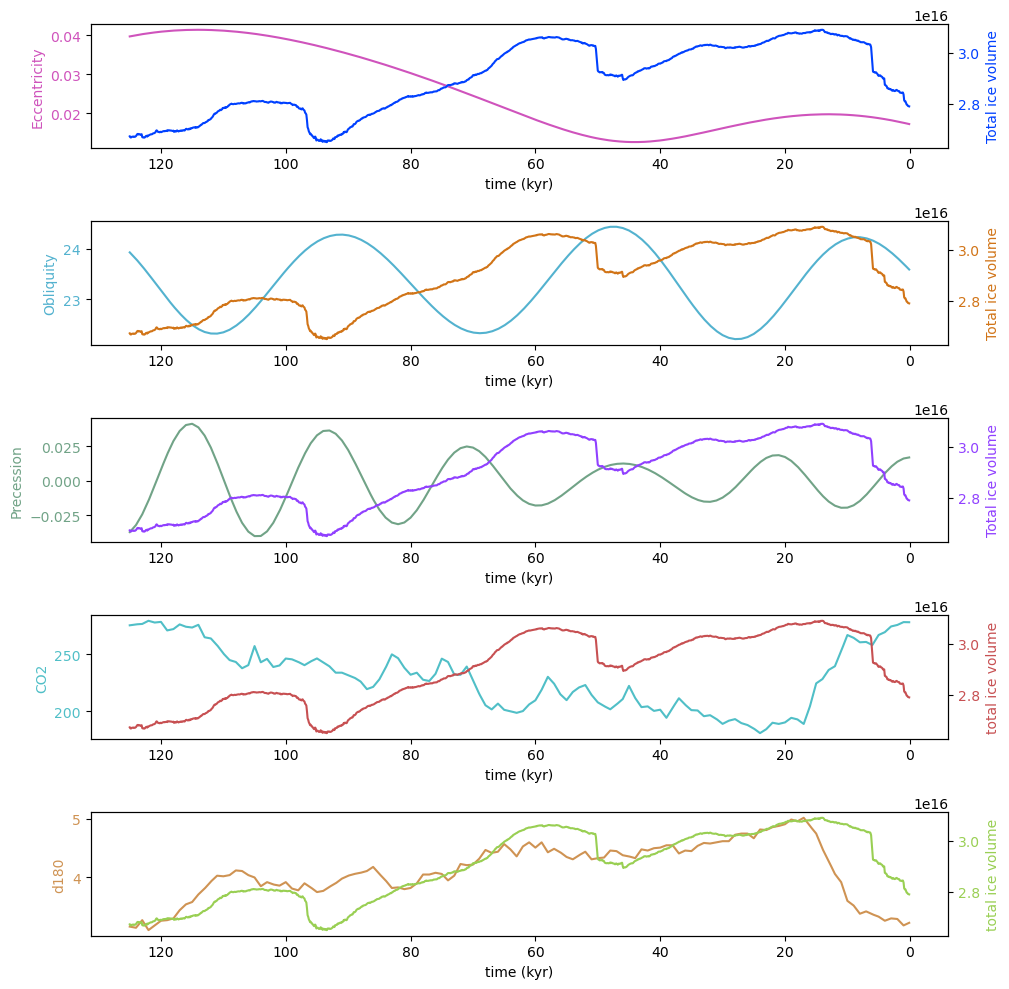

In [59]:
#Create axes
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize = (10,10))

print(time)
print(co2)
print(ts)
print(ax4)
time = np.array(time)
ax4, ax4a = two_scales(ax4, ice_time, re_co2, ts, '#50BFC7', '#C75052')
ax4.set_ylabel('CO2',color='#50BFC7')
ax4a.set_ylabel('total ice volume',color='#C75052')

ax5, ax5a = two_scales(ax5, ice_time, re_d180, ts, '#CF9353', '#99CF53')
ax5.set_ylabel('d180',color='#CF9353')
ax5a.set_ylabel('total ice volume',color='#99CF53')

####
ax1, ax1a = two_scales(ax1, ice_time, re_ec, ts, '#CF53BC', '#0040FF')
ax1.set_ylabel('Eccentricity',color='#CF53BC')
ax1a.set_ylabel('Total ice volume',color='#0040FF')

ax2, ax2a = two_scales(ax2, ice_time, re_ob, ts, '#53B2CF', '#D17417')
ax2.set_ylabel('Obliquity',color='#53B2CF')
ax2a.set_ylabel('Total ice volume',color='#D17417')

ax3, ax3a = two_scales(ax3, ice_time, re_pr, ts, '#71A387', '#9040FF')
ax3.set_ylabel('Precession',color='#71A387')
ax3a.set_ylabel('Total ice volume',color='#9040FF')

def color_y_axis(ax, color):
    for t in ax.get_yticklabels():
        t.set_color(color)

color_y_axis(ax1, '#CF53BC')
color_y_axis(ax1a, '#0040FF')
color_y_axis(ax2, '#53B2CF')
color_y_axis(ax2a, '#D17417')
color_y_axis(ax3, '#71A387')
color_y_axis(ax3a, '#9040FF')
color_y_axis(ax4, '#50BFC7')
color_y_axis(ax4a, '#C75052')
color_y_axis(ax5, '#CF9353')
color_y_axis(ax5a, '#99CF53')